<div style="text-align: center; line-height: 1.5;">
  <span style="font-size: 16px; font-weight: 700;">
    ME422 Mechatronics Systems Lab – Vibration
  </span><br>
  <span style="font-size: 14px; font-weight: 600;">
    E/20/198 – C.M. Keerthisena | 17th December, 2025
  </span>
</div>

---

**Activity 1: Derivation oF 2-DOF Model that will Capture the First Two Dominant Modes of Small Amplitude Vibration of the System**

Consider following schematic diagram of the experimental setup with given notations.

<div style="text-align: center;">
  <img src="https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/E20198_Fig1.png?raw=1" width="60%" style="display: block; margin: 0 auto;">

  <span style="display: block; text-align: center; margin-top: 5px;">
    <em>Figure 1: Schematic without damper (Reference: TM1016V User Guide 1022, Figure 10)</em>
  </span>
</div>


For small amplitude transverse vibrations of a slender beam, the system can be sufficiently accurately described by following PDE using Euler-Bernoulli beam theory as a continous system.

$$
{\rho A}{{\partial^2 y} \over {\partial t^2}} + c{{\partial y} \over {\partial t}}+EI{{\partial^4 y} \over {\partial x^4}}+P {{\partial^2 y} \over {\partial x^2}}=f(t,x)
$$

where $P$ is the axial compressive force, $\rho$ is the density of the material of the beam, and $E$ is the modulus of elasticity, $I$ is the cross sectional moment of inertia, $A$ is the cross sectional area of the uniform beam, $c$ is the distributed viscous damping per unit length along the beam, and $f(t,x)$ is the external tranverse load per unit length.


Since $P = 0$ for this case, the above PDE can be reduced to:

$$
{\rho A}{{\partial^2 y} \over {\partial t^2}} + c{{\partial y} \over {\partial t}}+EI{{\partial^4 y} \over {\partial x^4}}=f(t,x)
$$



The solutions of the above PDE that satisfy the boundary conditions of a beam with one end free and the base (rotational) elastically restrained with a spring.

\begin{align*}y(0,t)&=0,\:\:\:\:\:\:\: {\partial^3 y \over \partial x^3}(l_{beam},t)=0,\\ EI{\partial^2 y \over \partial x^2}(0,t)-k_{\theta}{\partial y \over \partial x}(0,t)&=0,\:\:\:\:\:\:\: {\partial^2 y \over \partial x^2}(l_{beam},t)=0,\end{align*}

where $k_{\theta} = k_{spring}l_{spring}^2$ is the rotational stiffness

**Free Vibration Analysis for Mode Shapes:**

Let $\mathfrak{F}$ be the infintie dimensional vector space of twice differentiable functions defined on the interval $[0,L]$. Then $H: \mathfrak{F}\mapsto \mathfrak{F}$ defined by

\begin{align}H&=\frac{EI} {\rho A}{{\partial^4 } \over {\partial x^4}}
\end{align}

is a linear operator on $\mathfrak{F}$ and the equations of motion take the form

\begin{align*}
{{\partial^2 y} \over {\partial t^2}} + C{{\partial y} \over {\partial t}}+Hy&=q(t,x)
\end{align*}

where $c = C \rho A$ and $f(t) = \rho A q(t)$

$H$ maps a transverse deflection shape to the acceleration caused purely by beam bending, subject to the beam’s boundary conditions. Let $H$ have distinct positive eignevalues $\{\omega_k^2\}_{k=1}^\infty$ with corrsponding eigenvectors $\{\psi_k\}_{k=1}^\infty$ i.e. mode shapes.

Then, the eigenvalue problem can be defined as:

\begin{align*}
H \psi_k(x) &= \omega_k^2 \psi(x)
\end{align*}

Substituting $H$, we get:

\begin{align*}
\frac{EI}{\rho A} \frac{\partial^4 \psi_k(x)}{\partial x^4} &= \omega_k^2 \psi_k(x) \\
\frac{\partial^4 \psi_k(x)}{\partial x^4} &= \frac{\rho A \, \omega_k^2}{EI} \psi_k(x)  \\
\frac{\partial^4 \psi_k(x)}{\partial x^4} &= \beta_k^4 \psi_k(x)
\end{align*}

where $\beta_k^4 = \frac{\rho A \, \omega_k^2}{EI}$

The general solution of the fourth-order differential equation $(1)$ is

\begin{align*}
\psi_k(x) = A_k \cosh(\beta_k x) + B_k \sinh(\beta_k x) + C_k \cos(\beta_k x) + D_k \sin(\beta_k x)
\end{align*}

where $A_k$, $B_k$, $C_k$, $D_k$ are constants determined from boundary conditions.

Boundary condition at base-end:

$$
\psi_k(0) = 0 \quad \Rightarrow \quad A_k + C_k = 0
$$

<br>

\begin{align*}
\psi_k'(0) &= \beta_k(B_k+D_k) \\
\psi_k''(0) &= \beta_k^2(A_k-C_k)
\end{align*}

Noting that $C_k = -A_k$, substitute $\psi_k'(0)$ and $\psi_k''(0)$ to,

\begin{align*}
EI \beta_k^2(A_k-C_k) - k_{\theta}\beta_k(B_k+D_k) &= 0 \\
2EI \beta_k^2A_k - k_{\theta}\beta_k(B_k+D_k) &= 0
\end{align*}

Boundary conditions at free-end:

\begin{align*}
\psi_k''(l_{beam}) = 0 & \Rightarrow
& A_k(\cosh(\beta_k l_{beam}) + \cos(\beta_k l_{beam})) + B_k\sinh(\beta_k l_{beam}) - D_k\sin(\beta_k l_{beam})  = 0 \\
\psi_k'''(l_{beam}) = 0 & \Rightarrow
& A_k(\sinh(\beta_k l_{beam}) - \sin(\beta_k l_{beam})) + B_k\cosh(\beta_k l_{beam}) - D_k \cos(\beta_k l_{beam}) = 0
\end{align*}

<br>

The above three equations form a linear homogeneous system.

$$
\mathbf{H}(\beta_k)\begin{bmatrix} A_k \\ B_k \\ D_k \end{bmatrix} = \mathbf{0}
$$

where $\mathbf{H}(\beta_k) \in \mathbb{M_{3x3}}$

For non-trivial solutions, $\text{det}\,\mathbf{H}(\beta_k) = 0$. Let us solve the determinent numerically to find $\beta_k$ for $k \in \mathbb{N}$ and the linear homogeneous system to find $A_k$, $B_k$ and $D_k$


In [3]:
import numpy as np
from numpy.linalg import det
from scipy.optimize import brentq
from scipy.linalg import svd

# ========= Determinent of the Characteristic Matrix =========
def char_det(beta, l_beam, EI, k_theta):

    bL = beta * l_beam

    H = np.array([
        [2*EI*beta**2,      -k_theta*beta,  -k_theta*beta],
        [np.cosh(bL)+np.cos(bL), np.sinh(bL), -np.sin(bL)],
        [np.sinh(bL)-np.sin(bL), np.cosh(bL), -np.cos(bL)]
    ])

    return det(H)

def find_betas(l_beam, EI, k_theta, n_roots=2, beta_max=50):
    betas = []
    beta_vals = np.linspace(1e-4, beta_max, 5000)

    f_vals = [char_det(b, l_beam, EI, k_theta) for b in beta_vals]

    for i in range(len(beta_vals)-1):
        if f_vals[i]*f_vals[i+1] < 0:
            root = brentq(
                char_det,
                beta_vals[i],
                beta_vals[i+1],
                args=(l_beam, EI, k_theta)
            )
            betas.append(root)

            if len(betas) >= n_roots:
                break

    return np.array(betas)

# ============ Solving for A,B,C,D Coefficients ===========
def mode_shape_coefficients(beta, l_beam, EI, k_theta):
    bL = beta * l_beam

    H = np.array([
        [2*EI*beta**2,      -k_theta*beta,  -k_theta*beta],
        [np.cosh(bL)+np.cos(bL), np.sinh(bL), -np.sin(bL)],
        [np.sinh(bL)-np.sin(bL), np.cosh(bL), -np.cos(bL)]
    ])

    # SVD -> right singular vector corresponding to smallest singular value
    U, S, Vh = svd(H)
    v = Vh[-1, :].copy()   # v ~ [A, B, D] up to sign/scale

    A, B, D = v
    C = -A
    return A, B, C, D

Then, the eigenvalues of $H$ are given by,

$$
\{\omega_k^2\}_{k=1}^\infty = \left\{\frac{EI}{\rho A}{\beta_k}^4\right\}_{k=1}^\infty
$$

and the eigenvectors/mode shapes of $H$ are given by,

$$
\{\psi_k\}_{k=1}^\infty = \left\{A_k \cosh(\beta_k x) + B_k \sinh(\beta_k x) + C_k \cos(\beta_k x) + D_k \sin(\beta_k x)\right\}_{k=1}^\infty
$$

$A_k$, $B_k$, $C_k$ and $D_k$ to be found using numerical methods programmed in above functions.

**Forced Vibration Response using Modal Expansion:**

In the event the oscillator is turned on, a forced vibration takes place due to oscillating force $Q$.

<div style="text-align: center;">
  <img src="https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/E20198_Fig3.png?raw=1" width="60%" style="display: block; margin: 0 auto;">

  <span style="display: block; text-align: center; margin-top: 5px;"><em>Figure 2: Oscillating Force of the Exciter (Reference: TM1016V User Guide 1022, Figure 18)</em></span>
</div>

Assuming there are no base excitations, let consider the external load on the beam to be:

$$
q(x,t) = Q \sin{\Omega t} ⋅ \delta(x - l_{exciter})
$$

The system can be modelled as decoupled forced, damped 1-DOF oscillators for each mode k in the following form:

$$
\ddot{y} + C\dot{y} + Hy = q(x,t) \ \ \Rightarrow \ \ m_k\ddot{z}_k+2\zeta_k\omega_km_k\dot{z}_k+ m_k\omega_k^2z_k =\langle\langle\psi_k(x),q(x,t)\rangle\rangle
$$

where $\zeta_k=\frac{C}{2\omega_k}$ and $m_k = \int_0^{l_\text{beam}} \rho A \, \psi_k^2(x)\,dx$

Modal masses normalise the arbitary scaling caused by the selection of $B_k$ and $D_k$ values.

Then, solving the decoupled ODE of each $k$ yields,

$$
z_k(t) = \chi_k(\Omega)\cos{(\Omega t+\phi_k(\Omega))}
$$

where $\chi_k(\Omega)$ is the steady-state amplitude and $\phi_k(\Omega)$ is the phase lag for the $k^{th}$ modal coordinate at forcing frequency $\Omega$.


Let us derive expressions for above definitions:

The mode shapes are orthonormal with respect to the inner product defined by:

\begin{align*}\langle\langle \psi_k(x),q(x)\rangle \rangle &= \int_0^{l_{beam}}\psi_k(x)q(x)\,dx \\
\langle\langle \psi_k(x),q(x)\rangle \rangle &= \int_0^{l_{beam}}\psi_k(x) Q \sin{(\Omega t)} \delta(x - l_{exciter})\,dx \\
&= Q \sin{(\Omega t)} \int_0^{l_{beam}}\psi_k(x) \delta(x - l_{exciter})\,dx \\
&= Q \sin{(\Omega t)} \psi_k(l_{exciter})
\end{align*}

By definition,

\begin{align*}
\chi_k(\Omega) & = \left|\frac{\langle\langle \psi_k(x),q(x)\rangle \rangle}{ m_k\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right| \\
\chi_k(\Omega) & = \left|\frac{Q \psi_k(l_{exciter})}{m_k\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right| \\
\end{align*}

and

$$
\phi_k(\Omega) =\arctan{\left(\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}\right)}
$$

Then, the **infinite dimensional solution** for this setup can be given by:

\begin{align*}
y(t,x)=\sum_{k=1}^\infty z_k(t)\psi_k(x)=\sum_{k=1}^\infty\chi_k(\Omega)\cos{(\Omega t+\phi_k(\Omega))}\psi_k(x)
\end{align*}

**Reduction to 2-DOF Model with Localised Spring–Damper Attachment:**

Truncating the infinite-dimensional solution to the first two dominant modes, the displacement can be approximated as:

\begin{align*}
y(t,x) \approx \chi_1(\Omega) \cos(\Omega t + \phi_1(\Omega)) \, \psi_1(x)
+ \chi_2(\Omega) \cos(\Omega t + \phi_2(\Omega)) \, \psi_2(x)
\end{align*}

The corresponding 2-DOF system in matrix form is given by,

\begin{align*}
\underbrace{\begin{bmatrix} m_1 & 0 \\ 0 & m_2 \end{bmatrix}}_{M_\text{beam}}
\begin{bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} 2 \zeta_1 \omega_1 m_1 & 0 \\ 0 & 2 \zeta_2 \omega_2 m_2 \end{bmatrix}}_{C_\text{beam}}
\begin{bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{bmatrix}
+
\underbrace{\begin{bmatrix} \omega_1^2 m_1 & 0 \\ 0 & \omega_2^2 m_2 \end{bmatrix}}_{K_\text{beam}}
\begin{bmatrix} z_1 \\ z_2 \end{bmatrix}
=
\underbrace{\begin{bmatrix} Q \psi_1(l_{exciter}) \sin{(\Omega t)} \\[1mm] Q \psi_2(l_{exciter}) \sin{(\Omega t)} \end{bmatrix}}_{F_{exciter}}
\end{align*}


Let us now account for the spring and viscous damper attachments.


<div style="text-align: center;">
  <img src="https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/E20198_Fig2.png?raw=1" width="55%" style="display: block; margin: 0 auto;">

  <span style="display: block; text-align: center; margin-top: 5px;"><em>Figure 3: Schematic Details of the Viscous Damper (Reference: TM1016V User Guide 1022, Figure 13)</em></span>
</div>

**Part I: Consideration of Additional Masses**

For accuracy, the theory allows for a proportion of the spring mass - that part which moves and contributes to the overall mass of the system. According to **Rayleigh's Theory**, this is equal to 1/3 the mass of the spring. The fixing between the spring and the beam also needs to be allowed for.

$$
m_{\text{eff}} = \frac{1}{3} m_{\text{spring}} + m_{\text{fixed}}
$$

The transverse acceleration at the attachment point is:

\begin{align*}
\ddot y(l_{\text{spring}},t)
=
\ddot z_1(t)\psi_1(l_{\text{spring}})
+ \ddot z_2(t)\psi_2(l_{\text{spring}})
\end{align*}

The inertia force exerted by the attached mass is:

\begin{align*}
F_{\text{inertia}}(t)
=
m_{\text{eff}}
\ddot y(l_{\text{spring}},t)
\end{align*}

Projecting this force onto the modal coordinates gives:

\begin{align*}
\begin{bmatrix}
F^{(m)}_1 \\
F^{(m)}_2
\end{bmatrix}
=
M_{\text{spring}}
\begin{bmatrix}
\ddot z_1 \\
\ddot z_2
\end{bmatrix}
\end{align*}

where the additional mass matrix is

\begin{align*}
M_{\text{spring}}
=
m_{\text{eff}}
\begin{bmatrix}
\psi_1^2(l_{\text{spring}}) &
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) \\
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) &
\psi_2^2(l_{\text{spring}})
\end{bmatrix}
\end{align*}

Similarly, additional masses of damper and exciter can be written as:

$$
M_{\text{damper}} =
m_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
$$

$$
M_{\text{exciter}} =
m_{\text{exciter}}
\begin{bmatrix}
\psi_1^2(l_{\text{exciter}}) &
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) \\
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) &
\psi_2^2(l_{\text{exciter}})
\end{bmatrix}
$$

<br>

**Part II: Consideration of Damper Attachment**



By applying the constitutive relation for a viscous damper,

\begin{align*}
F_{\text{damper}}(t) = c_{\text{damper}} \dot{y}(l_{\text{damper}},t)
\end{align*}

Using the two-mode approximation,

\begin{align*}
\dot y(l_{\text{damper}},t) = \dot z_1(t)\psi_1(l_{\text{damper}})+\dot z_2(t)\psi_2(l_{\text{damper}})
\end{align*}

The modal force acting on the $k^{\text{th}}$ mode is obtained by projection:

\begin{align*}
F^{(c)}_k(t) = c_{\text{damper}}\left(\dot{z_1}\psi_1(l_{\text{damper}}) +\dot{z_2}\psi_2(l_{\text{damper}})\right)\psi_k(l_{\text{damper}})
\end{align*}

This yields the matrix form:

\begin{align*}
\begin{bmatrix}
F^{(c)}_1 \\
F^{(c)}_2
\end{bmatrix} = C_{\text{damper}}
\begin{bmatrix}
\dot z_1 \\
\dot z_2
\end{bmatrix}
\end{align*}

where

\begin{align*}
C_{\text{damper}} =
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
\end{align*}

Dynamic and inertial contributions of spring, damper and exciter now can be included the 2-DOF system.

The final reduced system equation is given by:

$$
(\mathbf{M_\text{beam}} + \mathbf{M_\text{spring}} + \mathbf{M_\text{damper}} + \mathbf{M_\text{exciter}}) \mathbf{\ddot{z}} + (\mathbf{C_\text{beam} + \mathbf{C_{\text{damper}}}})\mathbf{\dot{z}} + \mathbf{K_{\text{beam}}}\mathbf{z} = \mathbf{F_{\text{exciter}}}
$$

where $\mathbf{M}, \mathbf{C}, \mathbf{K} \in \mathbb{M_{2x2}}$ and $\mathbf{F}, \mathbf{z} \in \mathbb{R_2}$

In [4]:
# ================= Beam Properties =================
b = 0.025          # Breadth (m)
h = 0.01           # Thickness (m)
A = b*h            # Cross-sectional area (m^2)
m_beam = 1.65      # Mass of the beam (m)
l_beam = 0.815     # Beam length (m)
E = 2e+11          # Modulus of Elasticity (Pa)
I = b * h**3 /12   # Area Moment of Inertia (m^4)
rho = m_beam/(A*l_beam) # Density (kg/m^3)

# ================= Spring Properties ==============
k_spring = 3800   # Spring stiffness (N/m)
l_spring = 0.75   # Location of spring along beam (m)
m_spring = 0.388  # Spring mass (kg)
m_fixed = 0.009   # Fixed mass attached to spring (kg)

# Rotational spring at base
k_theta = k_spring * l_spring * l_spring

# ================= Damper Properties ==============
l_damper = 0.2    # Location of damper along beam (m)
m_damper = 0.53   # Mass associated with damper (kg)

# ================= Exciter Properties =============
m_exciter = 4.2   # Exciter mass (kg)
l_exciter = 0.4   # Exciter location along beam (m)

In [5]:
from scipy.integrate import quad

# ================= Find first two betas =================
roots = find_betas(l_beam, E*I, k_theta, n_roots=2)
beta1, beta2 = roots
print(f"beta1 = {beta1:.4f}, beta2 = {beta2:.4f}")

# ================= Mode shape function =================
def psi(x, beta, l_beam, EI, k_theta):
    A, B, C, D = mode_shape_coefficients(beta, l_beam, EI, k_theta)
    return A*np.cosh(beta*x) + B*np.sinh(beta*x) + C*np.cos(beta*x) + D*np.sin(beta*x)

# ================= Evaluate psi at specific points =================
psi1_spring = psi(l_spring, beta1, l_beam, E*I, k_theta)
psi2_spring = psi(l_spring, beta2, l_beam, E*I, k_theta)

psi1_damper = psi(l_damper, beta1, l_beam, E*I, k_theta)
psi2_damper = psi(l_damper, beta2, l_beam, E*I, k_theta)

psi1_exciter = psi(l_exciter, beta1, l_beam, E*I, k_theta)
psi2_exciter = psi(l_exciter, beta2, l_beam, E*I, k_theta)

print(f"psi1(l_spring) = {psi1_spring:.4f}, psi2(l_spring) = {psi2_spring:.4f}")
print(f"psi1(l_damper) = {psi1_damper:.4f}, psi2(l_damper) = {psi2_damper:.4f}")
print(f"psi1(l_exciter) = {psi1_exciter:.4f}, psi2(l_exciter) = {psi2_exciter:.4f}")

# ================= Modal masses =================
def modal_mass(beta):
    """Integrate rho*A*psi^2 along the beam"""
    integrand = lambda x: rho * A * psi(x, beta, l_beam, E*I, k_theta)**2
    m, _ = quad(integrand, 0, l_beam)
    return m

m1 = modal_mass(beta1)
m2 = modal_mass(beta2)

# ================= Natural frequencies (Beam Only) =================
omega1 = (beta1**2) * np.sqrt(E*I/(rho*A))
omega2 = (beta2**2) * np.sqrt(E*I/(rho*A))

print(f"Modal mass m1 = {m1:.4f} kg, m2 = {m2:.4f} kg")
print(f"Natural frequencies for beam alone: omega1 = {omega1:.4f} rad/s, omega2 = {omega2:.4f} rad/s")

beta1 = 1.9417, beta2 = 5.1942
psi1(l_spring) = -1.3706, psi2(l_spring) = -0.8789
psi1(l_damper) = -0.2491, psi2(l_damper) = 0.7102
psi1(l_exciter) = -0.6133, psi2(l_exciter) = 0.8923
Modal mass m1 = 1.0818 kg, m2 = 0.7688 kg
Natural frequencies for beam alone: omega1 = 54.0892 rad/s, omega2 = 387.0553 rad/s


In [6]:
import numpy as np

# ========= BEAM MATRICES =========
M_beam = np.array([[m1, 0.0],
                   [0.0, m2]])
K_beam = np.array([[m1 * omega1**2, 0.0],
                   [0.0, m2 * omega2**2]])

# ========= SPRING MASS =========
m_eff_spring = (1/3) * m_spring + m_fixed
M_spring = m_eff_spring * np.array([[psi1_spring**2, psi1_spring * psi2_spring],
                                    [psi1_spring * psi2_spring, psi2_spring**2]])

# ========= DAMPER MASS =========
M_damper = m_damper * np.array([[psi1_damper**2, psi1_damper * psi2_damper],
                                [psi1_damper * psi2_damper, psi2_damper**2]])

# ========= EXCITER MASS =========
M_exciter = m_exciter * np.array([[psi1_exciter**2, psi1_exciter * psi2_exciter],
                                 [psi1_exciter * psi2_exciter, psi2_exciter**2]])

def print_matrix(name, mat):
    print(f"{name}:")
    for row in mat:
        print("  [" + ", ".join(f"{val:10.3f}" for val in row) + "]")
    print()  # blank line for spacing

print_matrix("M_beam", M_beam)
print_matrix("M_spring", M_spring)
print_matrix("M_damper", M_damper)
print_matrix("M_exciter", M_exciter)
print_matrix("K_beam", K_beam)


M_beam:
  [     1.082,      0.000]
  [     0.000,      0.769]

M_spring:
  [     0.260,      0.167]
  [     0.167,      0.107]

M_damper:
  [     0.033,     -0.094]
  [    -0.094,      0.267]

M_exciter:
  [     1.580,     -2.298]
  [    -2.298,      3.344]

K_beam:
  [  3164.958,      0.000]
  [     0.000, 115171.455]



---

**Activity 2: Estimation of Damping Ratios of the Two Dominant Modes**

Recall the governing equation of the system with the attachments.

$$
 \mathbf{M}\mathbf{\ddot{z}} + \mathbf{C}\mathbf{\dot{z}} + \mathbf{K}\mathbf{z} = \mathbf{F_{\text{exciter}}}
$$

where $\mathbf{M} = \mathbf{M_\text{beam}} + \mathbf{M_\text{spring}} + \mathbf{M_\text{damper}} + \mathbf{M_\text{exciter}}$, $\mathbf{C} = \mathbf{C_\text{beam} + \mathbf{C_{\text{damper}}}} $ and $\mathbf{K} = \mathbf{K_{\text{beam}}}$




Comsider the free vibration solution to the above dynamic equation:

$$
\mathbf{M}\mathbf{\ddot{z}} +\mathbf{C}\mathbf{\dot{z}} + \mathbf{K}\mathbf{z} = 0
$$

Assume the solution to be $\mathbf{z}(t) = 𝛟 \,e^{j \omega t}$ and consider the undamped response of the system to find the natural frequencies and mode shapes of the system.

\begin{align*}
(\mathbf{K}-\omega^2\mathbf{M})\,\phi = 0 \\
\text{det}(\mathbf{K}-\omega^2\mathbf{M}) = 0
\end{align*}

Solving above eigenvalue problem gives two natural frequencies $\omega_1, \omega_2$ and corresponding eigenvectors $\phi_1, \phi_2$, where $\phi \in \mathbb{R_2}$

Let the modal matrix be:

$$
\Phi = \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix}
$$

Let us calculate the numerical values for above parameters.

In [7]:
from scipy.linalg import eigh

# ================= Natural frequencies (Full System) =================
M = M_beam + M_spring + M_damper + M_exciter
K = K_beam

eigvals, eigvecs = eigh(K, M)
omega_n = np.sqrt(eigvals)

print("Natural frequencies including attachments:")
for i, w in enumerate(omega_n, 1):
    print(f"Mode {i}: {w:.3f} rad/s = {w/(2*np.pi):.3f} Hz")

Phi = eigvecs
print_matrix("Modal Matrix", Phi)

Natural frequencies including attachments:
Mode 1: 32.472 rad/s = 5.168 Hz
Mode 2: 204.048 rad/s = 32.475 Hz
Modal Matrix:
  [    -0.573,      0.461]
  [     0.012,      0.596]



Consider the new coordinate vector $\mathbf{q}(t)$ such that:

$$
\mathbf{z}(t) = \Phi \,\mathbf{q}(t)
$$

We can write the forced vibration equation:

$$
\mathbf{M}\Phi\mathbf{\ddot{q}} +\mathbf{C}\Phi\mathbf{\dot{q}} + \mathbf{K}\Phi\mathbf{q} = \mathbf{F_{exciter}}
$$

By left multipying with $\Phi^T$, modal matrices are defined as:

$$
\underbrace{\mathbf{\Phi}^T\mathbf{M}\mathbf{\Phi}}_{\mathbf{M}_m}\mathbf{\ddot{q}} + \underbrace{\mathbf{\Phi}^T\mathbf{C}\mathbf{\Phi}}_{\mathbf{C}_m}\mathbf{\dot{q}} + \underbrace{\mathbf{\Phi}^T\mathbf{K}\mathbf{\Phi}}_{\mathbf{K}_m}\mathbf{q} = \underbrace{\mathbf{\Phi}^T\mathbf{F_{exciter}}}_{\mathbf{F}_m}
$$

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = \mathbf{F_m}
$$
<br>
For the undamped eigenvectors of $(\mathbf{K}, \mathbf{M})$, we know $\mathbf{M_m}$ and $\mathbf{K_m}$ is diagonal.

For free vibration response:

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = 0
$$

In new modal equation, each mode behaves like a 1-DOF oscillator if damping does not introduce coupling. i.e. $\mathbf{C_m}$ is also diagonal.

From $\zeta_k = \frac{c}{2m_k\omega_k}$, we can deduce the modal damping ratio for complete system as:

$$
\zeta_k = \frac{\phi_k^T \mathbf{C} \phi_k}{2\omega_k\phi_k^T \mathbf{M} \phi_k} \tag{2}
$$

Since $\mathbf{C} = \mathbf{C_{beam}} + \mathbf{C_{damper}}$ is unknown, we need a create damping model.

We already know that $\mathbf{C_{beam}}$ is diagonal from modal reduction of beam alone, and $\mathbf{C_{damper}}$ is given by:

\begin{align*}
C_{\text{damper}} =
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}
\end{align*}

Consider the mode shapes of the beam alone:

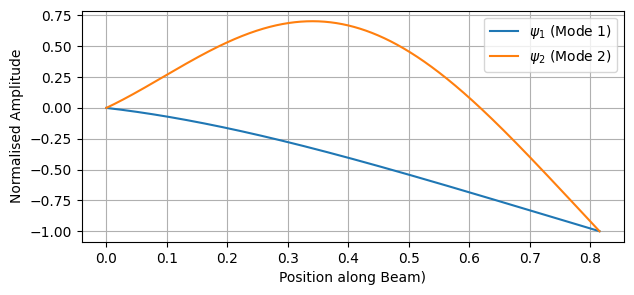

In [8]:
import matplotlib.pyplot as plt

# ================= Modes Shapes of the Beam Only =================
x = np.linspace(0, l_beam, 1000)

psi1 = psi(x, beta1, l_beam, E*I, k_theta)
psi2 = psi(x, beta2, l_beam, E*I, k_theta)

psi1_norm = psi1 / np.max(np.abs(psi1))
psi2_norm = psi2 / np.max(np.abs(psi2))

plt.figure(figsize=(7, 3))
plt.plot(x, psi1_norm, label=r'$\psi_1$ (Mode 1)')
plt.plot(x, psi2_norm, label=r'$\psi_2$ (Mode 2)')

plt.xlabel('Position along Beam)')
plt.ylabel('Normalised Amplitude')
plt.grid(True)
plt.legend()
plt.show()

From the above results, we can assume that at $l_{damper} = 0.2\,m,\,\, |\psi_1(l_{damper})| << |\psi_2(l_{damper})|$. To be precise, we have already computed that $\psi_1(l_{damper}) = -0.2491$ and $\psi_2(l_{damper}) = 0.7102$. Then,

$$
\psi_2^2(l_{damper}) = 0.5044 \:\:\:\:\:\:\: \psi_1(l_{damper})\psi_2(l_{damper}) = -0.1769
$$

<br>

Therefore, $|\psi_1(l_{damper})| << |\psi_2(l_{damper})|$ and the off-diagonal terms of $C_{damper}$ can be neglected. i.e. the coupling is small.

Hence, assume **Reyleigh Proportional Damping** for the system:

$$
\mathbf{C} = \alpha\,\mathbf{M} + \beta\,\mathbf{K}
$$

Then,

$$
\phi_k^T\mathbf{C}\phi_k = \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta\,\phi_k^T\mathbf{K}\phi_k \tag{3}
$$

Recall:

\begin{align*}
(\mathbf{K}-\omega^2\mathbf{M})\,\phi &= 0 \\
\phi_k^T\mathbf{K}\phi_k &= \omega_k^2\phi_k^T\mathbf{M}\phi_k
\end{align*}

Back substitute to $(3)$:

\begin{align*}
\phi_k^T\mathbf{C}\phi_k &= \alpha\,\phi_k^T\mathbf{M}\phi_k + \beta\,(\omega_k^2\phi_k^T\mathbf{M}\phi_k) \\
\phi_k^T\mathbf{C}\phi_k &= (\alpha\ + \beta\,\omega_k^2) \phi_k^T\mathbf{M}\phi_k
\end{align*}

Back substitute to $(2)$:

$$
\zeta_k = \frac{(\alpha\ + \beta\,\omega_k^2) \phi_k^T\mathbf{M}\phi_k}{2\omega_k\phi_k^T \mathbf{M} \phi_k}
$$

$$
\zeta_k = \frac{1}{2} (\frac{\alpha}{\omega_k}+\beta\omega_k)
$$

Since $|\psi_1(l_{beam})| << |\psi_2(l_{beam})|$, the damper is closer to the second mode antinode and the first mode node. This means it predominantly affects the second mode, that is the high frequency mode.

Therefore, we can assume stiffness proportional damping for this system ($\zeta_2 > \zeta_1$). Take $\alpha = 0$.

$$
\zeta_k = \frac{\beta \omega_k}{2}
$$



Since the maximum operating frequency of the exciter in the experimental setup is 17 Hz and $\omega_2$ > 17 Hz, we can only experimentally estimate $\zeta_1$ at $\omega_1$. Using that relationship, $\zeta_2$ can be found.

$$
\zeta_1 = \frac{\beta \omega_1}{2} \:\:\:\:\:\:\:\ \text{and} \:\:\:\:\:\:\:\ \zeta_2 = \frac{\beta \omega_2}{2}
$$

$$
\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}
$$

Consider the damped natural response at the supposed first mode as observed.

<div style="text-align: center;">
  <img src="https://github.com/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/Images/Damped Natural Frequency.png?raw=1" width="100%" style="display: block; margin: 0 auto;">

  <span style="display: block; text-align: center; margin-top: 5px;"><em>Figure 4: Damped Natural Response of the System</em></span>
</div>

Since the initial displacement was applied at the free end of the beam, the free-decay response is dominated by the first mode, which has its maximum displacement (antinode) at the free end.

Therefore, we can deduce that the damping ratio observed in above response is $\zeta_1$.

\begin{align*}
\zeta_2 &= \zeta_1 \frac{\omega_2}{\omega_1}\\
\zeta_2 &= 0.023 \times \frac{204.048\,\,rad/s}{32.472\,\,rad/s}\\
\zeta_2 &= 0.145
\end{align*}



Therefore, estimated damping ratios for first two dominant modes:

$$
\zeta_1 = 0.023 \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: \zeta_2 = 0.145
$$

---

**Activity 3: Graphical Representation of Selected Parameters**

**3.1 The Unforced Repsonse to an Initiail Diplacement of the Spring End of the Beam**

From the modal coordinates of the complete system:

$$
\mathbf{z}(t) = \Phi \,\mathbf{q}(t)
$$

$$
\begin{bmatrix}
z_1(t) \\ z_2(t)
\end{bmatrix}
=
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}
\end{bmatrix}
\begin{bmatrix}
q_1(t) \\ q_2(t)
\end{bmatrix}
$$

Recall the truncated original 2-DOF solution for $y(x,t)$ for beam alone:

$$
y(x,t) = z_1(t) \psi_1(x) + z_2(t) \psi_2(x)
$$

We can rewrite the mode shapes to adjust the complete system with attachments.


\begin{align*}
y(x,t) &= (\phi_{11}\,q_1(t)+\phi_{12} \, q_2(t)) \psi_1(x) + (\phi_{21}\, q_1(t)+\phi_{22}\, q_2(t)) \psi_2(x) \\\\
y(x,t) &= \underbrace{(\phi_{11}\,\psi_1(x)+\phi_{21} \, \psi_2(x))}_{\psi_1^*(x)} q_1(t) + \underbrace{(\phi_{12}\,\psi_1(x)+\phi_{22} \, \psi_2(x))}_{\psi_2^*(x)} q_2(t)
\end{align*}

Let the initial displacement be $y(l_{beam}, 0) = y_o$. For that,

$$
y_o = \psi_1^*(l_{beam}) q_1(0) + \psi_2^*(l_{beam}) q_2(0)
$$

Since there are two unknowns and the initial displacement was applied at the free end of the beam, assume the response is dominated by the first mode only.

$$
q_2(0) = 0 \,\,\,\,\,\,\,\,\, \Rightarrow \,\,\,\,\,\,\,\,\, q_1(0) = \frac{y_o}{\psi_1^*({l_{beam})}}
$$

In order to find $q_1(t)$ and $q_2(t)$, the following ODE for unforced response need to be solved.

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = 0
$$

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\beta\mathbf{K_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = 0
$$

with the initial conditions:

$$
\mathbf{q}(0) =
\begin{bmatrix}
q_1(0) \\ 0
\end{bmatrix},
\:\:\:\:
\mathbf{\ddot{q}}(0) =
\mathbf{\dot{q}}(0) =
\begin{bmatrix}
0 \\ 0
\end{bmatrix}
$$

where $\beta = \frac{2 \zeta_1}{\omega_1} =  \frac{2 \zeta_2}{\omega_2}$

Once $q_1(t)$ and $q_2(t)$ is found. For final solution of free damped vibration, substitute back to:

$$
y(x,t) = \psi_1^*(x) q_1(t) + \psi_2^*(x) q_2(t)
$$

In [9]:
y_o = 0.005         # Give a displacement value (m)

phi11 = Phi[0, 0]
phi12 = Phi[0, 1]
phi21 = Phi[1, 0]
phi22 = Phi[1, 1]

# =============== Mode Shape for Complete System ================
def psi_star_1(x):
    return phi11 * psi(x, beta1, l_beam, E*I, k_theta) + \
           phi21 * psi(x, beta2, l_beam, E*I, k_theta)

def psi_star_2(x):
    return phi12 * psi(x, beta1, l_beam, E*I, k_theta) + \
           phi22 * psi(x, beta2, l_beam, E*I, k_theta)

psi_star_1_l_beam = psi_star_1(l_beam)
print(f"psi_star_1(l_beam) = {psi_star_1_l_beam:.4f}")

q1_0 = y_o / psi_star_1_l_beam
print(f"Initial modal coordinate q1_0 = {q1_0:.4f}")

# =========== Diagonalised Matrices M_m, C_m and K_m ============
M_m = Phi.T @ M @ Phi
K_m = Phi.T @ K @ Phi

zeta1 = 0.023
zeta2 = 0.145
beta = 2 * zeta1 / omega_n[0]

C_m = beta * K_m

psi_star_1(l_beam) = 0.8515
Initial modal coordinate q1_0 = 0.0059


In [10]:
from scipy.integrate import odeint

# =============== ODE solution for Free Vibration ================
def system_ode(q_vec, t, M_m_inv, C_m, K_m):
    q1, q2, q1_dot, q2_dot = q_vec
    q = np.array([q1, q2])
    q_dot = np.array([q1_dot, q2_dot])

    # M_m_inv * (-C_m * q_dot - K_m * q)
    q_ddot = M_m_inv @ (-C_m @ q_dot - K_m @ q)

    return [q1_dot, q2_dot, q_ddot[0], q_ddot[1]]

M_m_inv = np.linalg.inv(M_m)

q1_0_val = q1_0
q2_0_val = 0.0

q_dot1_0 = 0.0
q_dot2_0 = 0.0

q_initial = [q1_0_val, q2_0_val, q_dot1_0, q_dot2_0]

t = np.arange(0, 5, 0.001)

solution = odeint(system_ode, q_initial, t, args=(M_m_inv, C_m, K_m))

# Homogeneous solution for Free Vibration
q1h_t = solution[:, 0]
q2h_t = solution[:, 1]

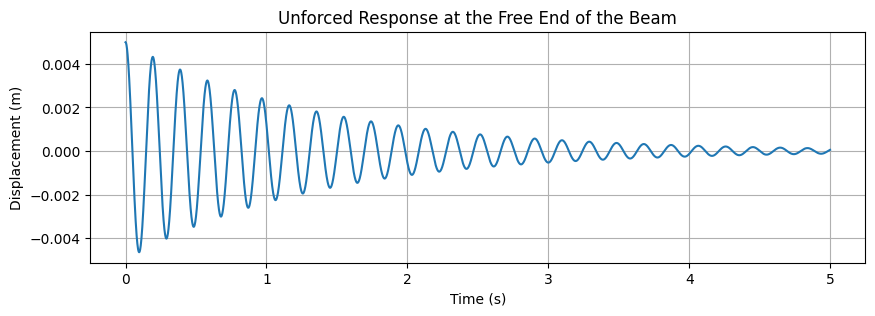

In [11]:
# =============== Damped Natural Response at Free End ================
z1_t = np.zeros_like(t)
z2_t = np.zeros_like(t)

for i in range(len(t)):
    q_vector = np.array([q1h_t[i], q2h_t[i]])
    z_vector = Phi @ q_vector
    z1_t[i] = z_vector[0]
    z2_t[i] = z_vector[1]

psi1_l_beam = psi(l_beam, beta1, l_beam, E*I, k_theta)
psi2_l_beam = psi(l_beam, beta2, l_beam, E*I, k_theta)

y_l_beam_t = z1_t * psi1_l_beam + z2_t * psi2_l_beam

plt.figure(figsize=(10, 3))
plt.plot(t, y_l_beam_t)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Unforced Response at the Free End of the Beam')
plt.grid(True)
plt.show()

In [12]:
y_x_t = np.zeros((len(t), len(x)))

# =============== Animated Beam Response y(x,t) ================
for i in range(len(t)):
    def psi_star_1_full(x_vals):
        return (phi11 * psi(x_vals, beta1, l_beam, E*I, k_theta) +
                phi21 * psi(x_vals, beta2, l_beam, E*I, k_theta))

    def psi_star_2_full(x_vals):
        return (phi12 * psi(x_vals, beta1, l_beam, E*I, k_theta) +
                phi22 * psi(x_vals, beta2, l_beam, E*I, k_theta))

    y_x_t[i, :] = (
        psi_star_1_full(x) * q1h_t[i] +
        psi_star_2_full(x) * q2h_t[i]
    )

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlim(0, l_beam)

max_disp = np.max(np.abs(y_x_t)) * 1.1
ax.set_ylim(-max_disp, max_disp)

ax.set_xlabel('Position along Beam (m)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Beam Vibration a (Unforced Response)')
ax.grid(True)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, y_x_t[i, :])
    return line,

skip = 10
frames_idx = range(0, len(t), skip)

animation = FuncAnimation(
    fig, animate, init_func=init, frames=frames_idx,
    interval=int((t[1] - t[0]) * skip * 1000),
    blit=True)

plt.close(fig)
HTML(animation.to_html5_video()) # Use Colab Notebook


**3.2 The Forced Response for Three Choices of the Rotational Speed of the Motor**

Consider the forced response to the complete system.

$$
\mathbf{M_m}\mathbf{\ddot{q}} +\mathbf{C_m}\mathbf{\dot{q}} + \mathbf{K_m}\mathbf{q} = \mathbf{F_m}
$$

where

$$
\mathbf{F_{m}} = \Phi^T \mathbf{F_{exciter}}, \,\,\,\,\,\,\,\,\, \text{where} \,\,\,\,\,\,\, \mathbf{F_{exciter}} = \begin{bmatrix} Q(\Omega) \psi_1^*(l_{exciter}) \sin{(\Omega t)} \\[1mm] Q(\Omega) \psi_2^*(l_{exciter}) \sin{(\Omega t)}
\end{bmatrix}
$$

The rotating unbalance of the exciter motor can be given by,

$$
Q(\Omega) = m_{ecc} r \Omega^2
$$

where $m_{ecc}$ is the eccentric mass and $r$ is the offset of the eccentric mass of the servomotor exciter.

The above non-homogeneous ODE can be then solved for $\mathbf{q_t}(t)$ particular solution due to forcing, which can be back substituted to following displacement solution for the plot.

$$
y(x,t) = \psi_1^*(x) q_1(t) + \psi_2^*(x) q_2(t)
$$

In [13]:
# =============== Input Exciter Parameters ================
Omega_1 = 32.472    # Near first resonance
Omega_2 = 100.0     # Intermediate
Omega_3 = 204.048   # Near second resonance

Omega_list = [Omega_1, Omega_2, Omega_3]

m_ecc =  0.0045     # Eccentric mass x 2 (kg)
r     =  0.035      # Offset (m)

def compute_Q(m_ecc, r, Omega):
    #return 1.0
    return 2 * m_ecc * r * Omega**2

In [14]:
# =============== ODE solution for Forced Vibration ================
def system_ode_forced(q_vec, t, M_m_inv, C_m, K_m, Omega, Q, psi_star_l):
    q1, q2, q1_dot, q2_dot = q_vec
    q = np.array([q1, q2])
    q_dot = np.array([q1_dot, q2_dot])

    f_physical = psi_star_l * Q * np.sin(Omega * t)
    f_modal = Phi.T @ f_physical

    # Forced equation of motion
    q_ddot = M_m_inv @ (f_modal - C_m @ q_dot - K_m @ q)

    return [q1_dot, q2_dot, q_ddot[0], q_ddot[1]]

# Initial conditions
q_initial = [0.0, 0.0, 0.0, 0.0]

psi_star_l = np.array([psi_star_1(l_exciter), psi_star_2(l_exciter)])

#Solutions for Three Motor Speeds
solutions = []

for Omega in Omega_list:

    Q = compute_Q(m_ecc, r, Omega)

    solution = odeint(system_ode_forced, q_initial, t,
    args=(M_m_inv, C_m, K_m, Omega, Q, psi_star_l)
    )

    solutions.append(solution)

In [15]:
# =============== Animated Beam Response y(x,t) ================
for idx, Omega in enumerate(Omega_list):

    solution = solutions[idx]
    q1_t = solution[:, 0]
    q2_t = solution[:, 1]

    y_x_t = np.zeros((len(t), len(x)))
    for i in range(len(t)):
        y_x_t[i, :] = (
            psi_star_1_full(x) * q1_t[i] +
            psi_star_2_full(x) * q2_t[i]
        )

    fig, ax = plt.subplots(figsize=(7, 3))
    ax.set_xlim(0, l_beam)

    max_disp = np.max(np.abs(y_x_t)) * 1.1
    ax.set_ylim(-max_disp, max_disp)

    ax.set_xlabel('Position along Beam (m)')
    ax.set_ylabel('Displacement (m)')
    ax.set_title(f'Forced Response, Ω = {Omega:.2f} rad/s')
    ax.grid(True)

    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        line.set_data(x, y_x_t[i, :])
        return line,

    skip = 10
    frames_idx = range(0, len(t), skip)

    animation = FuncAnimation(
        fig, animate, init_func=init, frames=frames_idx,
        interval=int((t[1] - t[0]) * skip * 1000),
        blit=True
    )

    plt.close(fig)
    display(HTML(animation.to_html5_video())) # Use Colab Notebook

**3.3 Theoretical Frequency Response of the System that Captures the First Two Dominant Modes**

We can modify $\chi_k(\Omega) = \left|\frac{Q \psi_k(l_{exciter})}{m_k\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right|
$ and $\phi_k(\Omega) =\arctan{\left(\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}\right)}$ to represent the modal amplitudes and phases of complete system with attachments.

$$
\chi_k^*(\Omega) = \left|\frac{Q(\Omega) \psi_k^*(l_{exciter})}{M_{m_k}\sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}}\right|
$$

$$
\phi^*_k(\Omega) =\arctan{\left(\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}\right)}
$$

**Note:** Here, $\omega_k$ and $\zeta_k$ are natural frequencies and damping ratios of the complete system with attachements.

Then, we can write:

\begin{align*}
y(x,t) &= \psi_1^*(x) q_1(t) + \psi_2^*(x) q_2(t) \\
y(x,t) &= \chi_1^*(\Omega) \cos(\Omega t + \phi^*_1(\Omega)) \, \psi^*_1(x)
+ \chi_2^*(\Omega) \cos(\Omega t + \phi^*_2(\Omega)) \, \psi^*_2(x)
\end{align*}


Substitute $\cos(\Omega t + \phi^*_k(\Omega) = \Re \{ e^{j(\Omega t + \phi_k^*(\Omega))} \}$

\begin{align*}
y(x,t) &= \Re \{ \chi_1^*(\Omega) \, \psi^*_1(x) \, e^{j(\Omega t + \phi_1^*(\Omega))}
+ \chi_2^*(\Omega) \, \psi^*_2(x) \, e^{j(\Omega t + \phi_1^*(\Omega))} \}  \\
y(x,t) &= \Re \{ \chi_1^*(\Omega) \, \psi^*_1(x) \, e^{j\Omega t} e^{j\phi_1^*(\Omega)}
+ \chi_2^*(\Omega) \, \psi^*_2(x) \, e^{j\Omega t} e^{j\phi_2^*(\Omega)} \} \\
y(x,t) &= \Re \{ \underbrace{[\chi_1^*(\Omega) \, \psi^*_1(x) \, e^{j\phi_1^*(\Omega)}
+ \chi_2^*(\Omega) \, \psi^*_2(x) \,  e^{j\phi_2^*(\Omega)}]}_{Y(x,\Omega)} e^{j\Omega t} \}
\end{align*}

We can then factor out the time-depedent term to obtain the displacement in frequency domain.

$$
Y(x,\Omega) = \chi_1^*(\Omega) \, \psi^*_1(x) \, e^{j\phi_1^*(\Omega)}
+ \chi_2^*(\Omega) \, \psi^*_2(x) \,  e^{j\phi_2^*(\Omega)}
$$

The frequency response of the system is given by,

$$
H(x,\Omega) = \frac{\text{Displacement Amplitude}}{\text{Force Amplitude}}=\frac{Y(x, \Omega)}{Q(\Omega)}
$$

<br>

Note that our original definition of $\chi^*_k$ contains only magnitude information, i.e. $|(\omega_k^2 - \Omega^2) + j(2 \zeta_k \Omega \omega_k)| = \sqrt{(\omega_k^2 - \Omega^2)^2+4\zeta_k^2\Omega^2\omega_k^2}$

However, for frequency response, we must revert back to its complex form to retain both magnitude and phase information. Then, we can write:

$$
Y(x,\Omega) =  \frac{Q(\Omega) \psi_1^*(l_{exciter})}{M_{m_1}((\omega_1^2 - \Omega^2)+j(2\zeta_1\Omega\omega_1))} \, \psi^*_1(x) \, e^{j\phi_1^*(\Omega)}
+ \frac{Q(\Omega) \psi_2^*(l_{exciter})}{M_{m_2}((\omega_2^2 - \Omega^2)+j(2\zeta_2\Omega\omega_2))} \, \psi^*_2(x) \,  e^{j\phi_2^*(\Omega)}
$$

$$
\frac{Y(x,\Omega)}{Q(\Omega)} = \frac{1}{Q(\Omega)} \left[\frac{Q(\Omega) \psi_1^*(l_{exciter}) \, \psi^*_1(x) \, e^{j\phi_1^*(\Omega)}}{M_{m_1}((\omega_1^2 - \Omega^2)+j(2\zeta_1\Omega\omega_1))}
+ \frac{Q(\Omega) \psi_2^*(l_{exciter}) \, \psi^*_2(x) \,  e^{j\phi_2^*(\Omega)}}{M_{m_2}((\omega_2^2 - \Omega^2)+j(2\zeta_2\Omega\omega_2))} \right]
$$

**Frequency Response Function:**

$$
H(x, \Omega) = \frac{\psi_1^*(l_{exciter}) \, \psi^*_1(x) \, e^{j\phi_1^*(\Omega)}}{M_{m_1}((\omega_1^2 - \Omega^2)+j(2\zeta_1\Omega\omega_1))}
+ \frac{\psi_2^*(l_{exciter}) \, \psi^*_2(x) \,  e^{j\phi_2^*(\Omega)}}{M_{m_2}((\omega_2^2 - \Omega^2)+j(2\zeta_2\Omega\omega_2))}
$$

Through this function, $|H(x,\Omega)|$ can be taken for magnitude response and $\text{arg}(H(x,\Omega))$ can be taken for phase response.

In [16]:
# ============ Input Beam Positions for FRF ==============
x1 = l_beam
x2 = l_damper
x3 = 0.67       # Near node of second mode

x_vals_f = np.array([x1,x2,x3])

psi1_x = np.array([psi_star_1(x) for x in x_vals_f])
psi2_x = np.array([psi_star_2(x) for x in x_vals_f])

psi1_le = psi_star_1(l_exciter)
psi2_le = psi_star_2(l_exciter)

omega_1, omega_2 = omega_n[0], omega_n[1]

M_m1 = M_m[0, 0]
M_m2 = M_m[1, 1]

# Phase calculation
def phi_star(Omega, omega_k, zeta_k):
    return np.arctan((2 * zeta_k * Omega * omega_k) /
                     (omega_k**2 - Omega**2))

# ============ Evaluation of FRF ==============
def H(x_idx, Omega):
    phi1 = phi_star(Omega, omega_1, zeta1)
    phi2 = phi_star(Omega, omega_2, zeta2)

    term1 = (psi1_le * psi1_x[x_idx] * np.exp(1j * phi1)) / \
            (M_m1 * ((omega_1**2 - Omega**2) + 1j * (2 * zeta1 * Omega * omega_1)))

    term2 = (psi2_le * psi2_x[x_idx] * np.exp(1j * phi2)) / \
            (M_m2 * ((omega_2**2 - Omega**2) + 1j * (2 * zeta2 * Omega * omega_2)))

    return term1 + term2

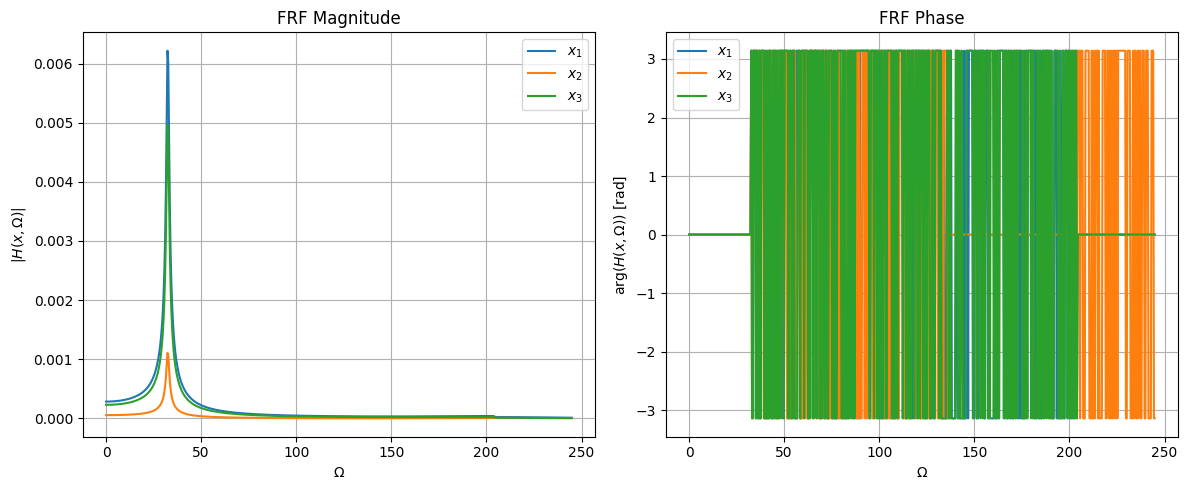

In [19]:
# ============ Frequency Response at 3 Selecteed Positions on Beam==============
Omega_vals = np.linspace(0.01, 1.2 * max(omega_1, omega_2), 600)

# --- Evaluate FRF ---
H_all = np.zeros((3, len(Omega_vals)), dtype=complex)

for i in range(3):
    for j, Omega in enumerate(Omega_vals):
        H_all[i, j] = H(i, Omega)

# --- Bode plots ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Magnitude
for i in range(3):
    axs[0].plot(Omega_vals, np.abs(H_all[i]), label=f"$x_{i+1}$")
axs[0].set_xlabel(r"$\Omega$")
axs[0].set_ylabel(r"$|H(x,\Omega)|$")
axs[0].set_title("FRF Magnitude")
axs[0].legend()
axs[0].grid(True)

# Phase
for i in range(3):
    axs[1].plot(Omega_vals, np.angle(H_all[i]), label=f"$x_{i+1}$")
axs[1].set_xlabel(r"$\Omega$")
axs[1].set_ylabel(r"$\arg(H(x,\Omega))$ [rad]")
axs[1].set_title("FRF Phase")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


---

**Activity 4: Comparison of Experimental Results with Theoretical Estimates**

---

**Activity 5: Design of a Tuned Mass Vibration Absorber for Operating the System near First Natural Mode of Vibration and Justification using Simulations**

---

**Activity 6: Experimental Verification of Tuned Mass Vibration Absorber Design**